In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
from keras.models import load_model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_slice = pd.read_csv('../Dataset/Normalisasi/processed_dataset_slice_norm.csv',sep=',')

In [3]:
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.647059,0.055556,0.0,0.000640
1,0.705882,0.333333,0.5,0.081254
2,0.882353,0.555556,0.0,0.000534
3,0.941176,0.833333,0.5,0.014585
4,0.647059,0.111111,1.0,0.618070


In [4]:
lstm_model = load_model('lstm_slice.h5')
lstm_model

In [5]:
x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(50540, 4, 1)

In [6]:
history = lstm_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1580/1580 [==============================] - 15s 8ms/step - loss: 0.2379 - accuracy: 0.8729 - mean_squared_error: 0.4189 - mean_absolute_error: 0.5000
Epoch 2/10
1580/1580 [==============================] - 12s 8ms/step - loss: 0.2357 - accuracy: 0.8745 - mean_squared_error: 0.4199 - mean_absolute_error: 0.5000
Epoch 3/10
1580/1580 [==============================] - 13s 8ms/step - loss: 0.2359 - accuracy: 0.8734 - mean_squared_error: 0.4200 - mean_absolute_error: 0.5000
Epoch 4/10
1580/1580 [==============================] - 14s 9ms/step - loss: 0.2341 - accuracy: 0.8762 - mean_squared_error: 0.4206 - mean_absolute_error: 0.5000
Epoch 5/10
1580/1580 [==============================] - 14s 9ms/step - loss: 0.2336 - accuracy: 0.8760 - mean_squared_error: 0.4211 - mean_absolute_error: 0.5000
Epoch 6/10
1580/1580 [==============================] - 14s 9ms/step - loss: 0.2324 - accuracy: 0.8770 - mean_squared_error: 0.4212 - mean_absolute_error: 0.5000
Epoch 7/10
1580/1580 [======

In [7]:
y_pred_train = lstm_model.predict(x_train)
y_pred_train

array([[9.8976809e-01, 1.0231958e-02],
       [9.6565628e-01, 3.4343742e-02],
       [1.2785038e-07, 9.9999988e-01],
       ...,
       [2.7119444e-04, 9.9972874e-01],
       [8.9439794e-02, 9.1056025e-01],
       [4.8425477e-07, 9.9999952e-01]], dtype=float32)

In [8]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]


In [9]:
df_x_train = x_train_awal
df_x_train['lstm_result_1'] = y_pred_train_1
df_x_train['lstm_result_2'] = y_pred_train_2
df_x_train['label'] = y_train
df_x_train

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
52757,0.882353,0.000000,1.0,0.532565,9.897681e-01,1.023196e-02,0
28936,0.941176,0.111111,1.0,0.848030,9.656563e-01,3.434374e-02,0
17678,0.882353,0.555556,0.0,0.562899,1.278504e-07,9.999999e-01,1
54228,0.705882,0.111111,0.5,0.068673,8.140892e-02,9.185911e-01,0
16503,0.882353,0.166667,0.0,0.000123,9.999084e-01,9.150620e-05,0
...,...,...,...,...,...,...,...
42747,0.647059,0.111111,1.0,0.976527,3.638223e-01,6.361777e-01,1
22584,0.000000,0.888889,0.0,0.000423,9.999992e-01,7.921227e-07,0
65462,0.941176,0.055556,1.0,0.241881,2.711944e-04,9.997287e-01,1
66037,0.941176,0.722222,0.5,0.068629,8.943979e-02,9.105603e-01,0


In [10]:
y_test_pred = lstm_model.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]

y_test_pred

array([[3.8319957e-01, 6.1680043e-01],
       [9.1681349e-01, 8.3186448e-02],
       [3.0002179e-10, 1.0000000e+00],
       ...,
       [1.0000000e+00, 2.5892630e-09],
       [2.5507235e-14, 1.0000000e+00],
       [1.0000000e+00, 5.7467531e-10]], dtype=float32)

In [11]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['label'] = y_test
df_x_test

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
11713,0.764706,0.555556,1.0,0.477935,3.831996e-01,6.168004e-01,0
52924,0.647059,0.388889,0.5,0.105974,9.168135e-01,8.318645e-02,0
4045,0.647059,0.055556,0.0,0.826409,3.000218e-10,1.000000e+00,1
54476,0.294118,1.000000,0.0,0.000046,1.000000e+00,1.951766e-09,0
19341,0.647059,0.111111,1.0,0.977027,3.637102e-01,6.362898e-01,1
...,...,...,...,...,...,...,...
21721,0.176471,0.777778,0.0,0.000421,1.000000e+00,1.756028e-09,0
55392,0.941176,0.000000,1.0,0.717873,9.897681e-01,1.023196e-02,0
30108,0.941176,0.888889,0.0,0.000481,1.000000e+00,2.589263e-09,0
49565,0.176471,0.888889,0.0,0.263331,2.550724e-14,1.000000e+00,1


In [12]:
df_x_train.to_csv('data_latih_2.csv', sep=',', index=False)
df_x_test.to_csv('data_test_2.csv',sep=',', index=False)

In [13]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [14]:
df_train = pd.read_csv('data_latih_2.csv', sep=',')
df_test = pd.read_csv('data_test_2.csv', sep=',')

In [15]:
x_train = df_train[['src','dst','Protocol', 'lstm_result_1','lstm_result_2']]
y_train = df_train['label']

x_test = df_test[['src','dst','Protocol', 'lstm_result_1','lstm_result_2']]
y_test = df_test['label']

In [16]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [43]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, return_train_score=True ,scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(var_smoothing=0.03511191734215131)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   56.2s finished


In [18]:
NB_Feature_Grid.best_score_

0.8904827859121488

In [19]:
grid_cv_data = pd.DataFrame(NB_Feature_Grid.cv_results_)
grid_cv_data.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023724,0.003027,0.004272,0.000634,1,{'var_smoothing': 1.0},0.892165,0.889592,0.889790,0.882271,...,0.888889,0.889768,0.888735,0.889065,0.888977,0.888537,0.888823,0.888691,0.888882,0.000334
1,0.021338,0.003487,0.003812,0.001195,0.811131,{'var_smoothing': 0.8111308307896871},0.893748,0.887812,0.890186,0.883063,...,0.888889,0.889658,0.888933,0.889395,0.888691,0.888889,0.889285,0.888493,0.889003,0.000370
2,0.023418,0.004692,0.004718,0.000658,0.657933,{'var_smoothing': 0.657933224657568},0.892560,0.886031,0.888603,0.880689,...,0.887592,0.888295,0.889043,0.887790,0.887746,0.888977,0.886998,0.887790,0.887906,0.000640
3,0.021440,0.003615,0.004646,0.000782,0.53367,{'var_smoothing': 0.533669923120631},0.892165,0.887020,0.887812,0.882271,...,0.887548,0.888141,0.887064,0.888867,0.887724,0.887350,0.888757,0.887482,0.887763,0.000601
4,0.029944,0.007264,0.005441,0.001186,0.432876,{'var_smoothing': 0.43287612810830584},0.893748,0.886427,0.888603,0.884052,...,0.888647,0.889153,0.888581,0.888691,0.888735,0.888317,0.888867,0.888515,0.888645,0.000305


In [20]:
test_value = grid_cv_data.mean_test_score.unique()
iteration = 0 
test_mean_value = []
for x in test_value:
    if (iteration <= 10):
        test_mean_value.append(x*100)
        iteration +=1 
    else:
        break

In [21]:

train_value = grid_cv_data.mean_train_score.unique()
iteration = 0 
train_mean_value = []
for x in test_value:
    if (iteration <= 10):
        train_mean_value.append(x*100)
        iteration +=1 
    else:
        break

In [37]:
alphas = [x for x in range(100)]

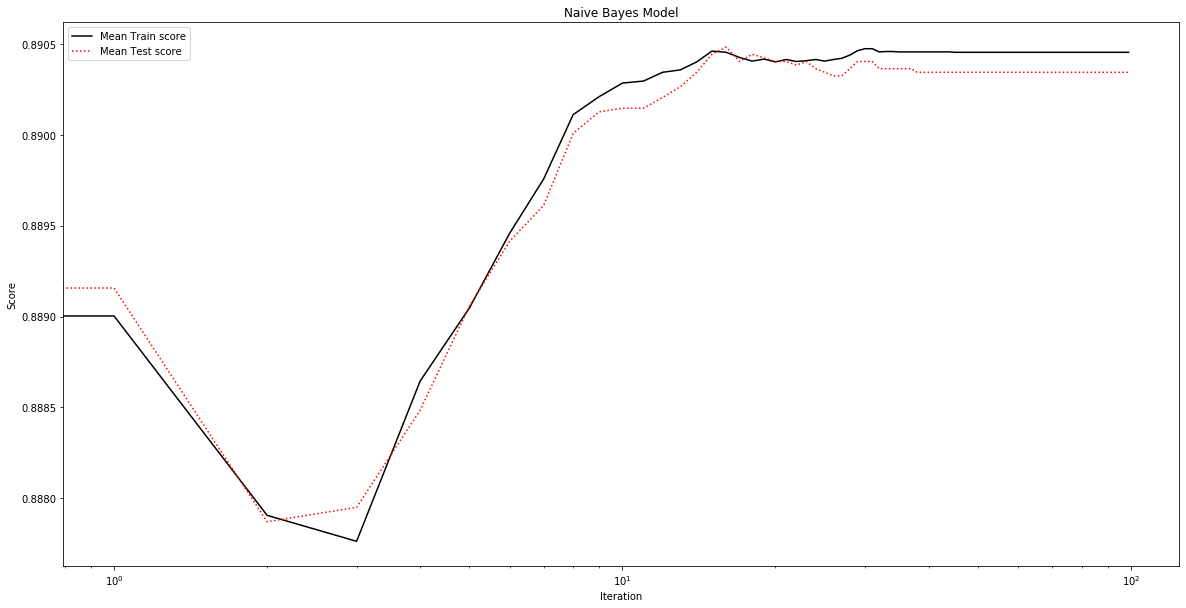

In [41]:
train_scores_mean = grid_cv_data["mean_train_score"]
test_scores_mean = grid_cv_data["mean_test_score"]

plt.figure(figsize=(20,10))
plt.title('Naive Bayes Model')
plt.xlabel('Iteration')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='black')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='red', linestyle='dotted')

plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=20, random_state=10, shuffle=True)
gaussion_nb = GaussianNB()
gaussion_nb.fit(x_train,y_train)
cv_train = cross_val_score(gaussion_nb, x_train, y_train, cv=kfold, scoring='accuracy')
cv_test = cross_val_score(gaussion_nb, x_test, y_test, cv=kfold, scoring='accuracy')
print('Naive Bayes GaussianNB cv score: ', cv_train)
print('Naive Bayes GaussianNB cv score: ', cv_test)

Naive Bayes GaussianNB cv score:  [0.89354966 0.89038385 0.89315394 0.88880095 0.88919668 0.87969925
 0.88761377 0.88603087 0.89750693 0.88919668 0.88484369 0.90185991
 0.89275821 0.89236249 0.89196676 0.88998813 0.89275821 0.89473684
 0.88365651 0.88880095]
Naive Bayes GaussianNB cv score:  [0.88745387 0.88273315 0.87719298 0.86980609 0.90489381 0.88457987
 0.86611265 0.90212373 0.86518929 0.88919668 0.87996307 0.89473684
 0.87626962 0.88734995 0.89012004 0.87072946 0.87534626 0.87811634
 0.90212373 0.8744229 ]


In [46]:
alphas = [x for x in range(10)] 

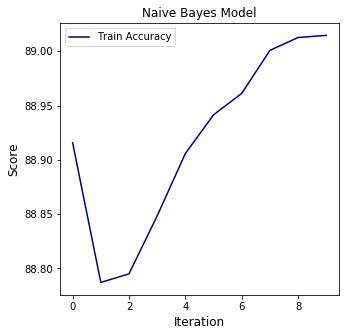

In [49]:
plt.figure(figsize=(5,5))
plt.title('Naive Bayes Model', fontsize=12)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.plot(alphas, train_mean_value[1:11], label='Train Accuracy',
             color='navy')
plt.legend(loc='best')
plt.show()

<Figure size 360x360 with 0 Axes>

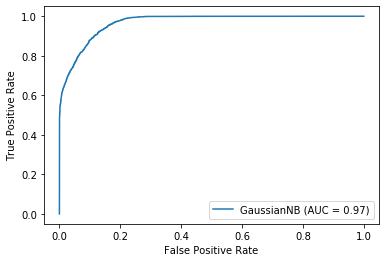

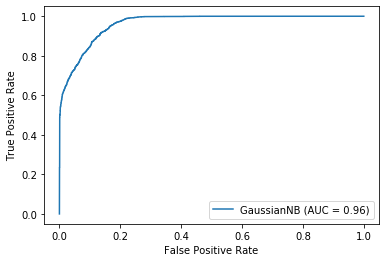

In [27]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(5,5))
plot_roc_curve(gaussion_nb, x_train, y_train)
plt.show()

plot_roc_curve(gaussion_nb, x_test, y_test)
plt.show()

In [29]:
df_history = pd.DataFrame(history.history)
df_history

,loss,accuracy,mean_squared_error,mean_absolute_error
0,0.237898,0.872873,0.418946,0.5
1,0.235708,0.874535,0.419868,0.5
2,0.235925,0.873427,0.420006,0.5
3,0.234111,0.876197,0.420642,0.5
4,0.233554,0.876019,0.421055,0.5
5,0.232352,0.876989,0.421205,0.5
6,0.229958,0.877721,0.422040,0.5
7,0.232003,0.875861,0.421454,0.5
8,0.229025,0.878195,0.422205,0.5
9,0.230400,0.877048,0.422222,0.5


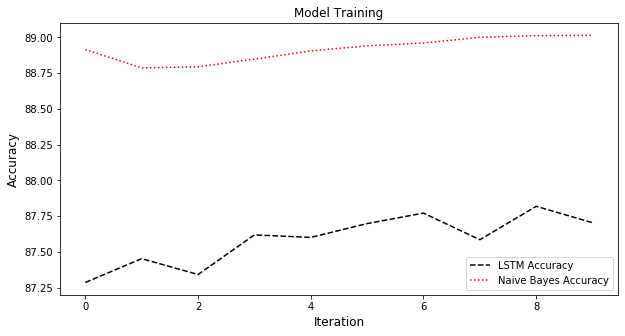

In [56]:
plt.figure(figsize=(10,5))
plt.title('Model Training', fontsize=12)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.plot(alphas, df_history['accuracy']*100, label='LSTM Accuracy',color='black', linestyle='--')
plt.plot(alphas, train_mean_value[1:11], label='Naive Bayes Accuracy', color='red', linestyle="dotted")
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Model Performance', fontsize=12)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.plot(alphas, df_history['accuracy']*100, label='Train Accuracy',
             color='navy')
plt.legend(loc='best')
plt.show()

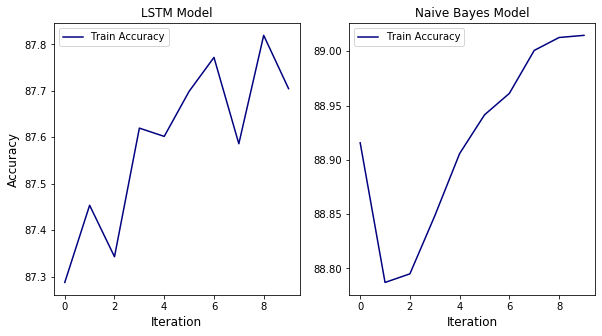

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('LSTM Model', fontsize=12)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(alphas, df_history['accuracy']*100, label='Train Accuracy', color='navy')
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.title('Naive Bayes Model', fontsize=12)
plt.xlabel('Iteration', fontsize=12)
plt.plot(alphas, train_mean_value[1:11], label='Train Accuracy', color='navy')
plt.legend(loc='best')
plt.show()